# Match Kitti Sequence version 22-11

Reads a sequence of stereo images as Frame. The Frames are scanned to identify FramePoints that are pixels that are at the top or botrom of vertical lines in the image. A patch is taken around each of the FramePoints in the left hand image, to match these to a patch in the right hand image and estimate the disparity/distance of the framePoint.

A Sequence is created in which the first Frame is the KeyFrame. It's initial FramePoints are culled to keep only the points for which there is a confident estimate of its depth. The consecutive frames are used to track the KeyFrame's remaining FramePoints. Only a limited number of all framePoints will be found in the consecutive frames, mostly because nearby objects become larger quickly as we get closer. The matching FramePoints are given the same FramePointId as the corresponding point in the KeyFrame and its depth is estimated.

The results are dumped into a folder 'dump', containing files 0.txt, 1.txt, etc. 0.txt contains the FramePoints as observed from the first frame, 1.txt form the second frame, etc. In these files, each row contains a single FramePoint with the values FramePointID, X, Y, Depth.

In [1]:
# when you change a setting you have to restart the kernel (settings are only loaded once)
import os
os.environ['STEREO_CONFIDENCE'] = '3.0'
os.environ['SEQUENCE_CONFIDENCE'] = '2.0'
#os.environ['PATCH_SIZE'] = '17'

import sys
sys.path.append('..')
from src.kitti import *
%matplotlib inline
import numpy as np
import glob

Read the frames for KITTI sequence 00.

In [2]:
%%time
SEQUENCE=7
LEFTDIR = '/data/urbinn/datasets/kitti/sequences/%02d/image_2'%SEQUENCE
RIGHTDIR = '/data/urbinn/datasets/kitti/sequences/%02d/image_3'%SEQUENCE

frame = []
for filename in sorted(glob.glob(LEFTDIR + '/*')):
    left_frame = Frame(filename, RIGHTDIR)
    frame.append(left_frame)

CPU times: user 4.57 ms, sys: 1.35 ms, total: 5.93 ms
Wall time: 4.96 ms


Turn the list of frames into a sequence. The first frame is automatically taken as the KeyFrame and its FramePoints are rerieved, depth is estimated, only the most confident points are kept, and they are tracked in the other frames.

In [3]:
seq = Sequence()
for f in ProgressBar()(frame[630:660]):
    seq.add_keyframe(f, run_ba=False)

  3% (1 of 30) |                          | Elapsed Time: 0:00:01 ETA:  0:00:37

connected mappoints  0


  6% (2 of 30) |#                         | Elapsed Time: 0:00:02 ETA:  0:00:38

connected mappoints  40


 10% (3 of 30) |##                        | Elapsed Time: 0:00:04 ETA:  0:00:39

connected mappoints  54
invalid speed keyframe 632 frame 633 speed 0.004262893952278413
 [[  9.99979436e-01   7.89883858e-04  -6.36428651e-03   6.58418025e-02]
 [ -8.03920158e-04   9.99997250e-01  -2.20322267e-03   3.45988729e-02]
 [  6.36252872e-03   2.20829374e-03   9.99977321e-01  -6.07995406e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (4 of 30) |###                       | Elapsed Time: 0:00:06 ETA:  0:00:39

connected mappoints  21
invalid speed keyframe 633 frame 634 speed 0.10002970443226777
 [[  9.99996022e-01   7.96463217e-04  -2.70579274e-03  -1.83277082e-02]
 [ -7.88711434e-04   9.99995586e-01   2.86474414e-03  -7.01755066e-02]
 [  2.70806246e-03  -2.86259865e-03   9.99992236e-01  -5.07965701e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (5 of 30) |####                      | Elapsed Time: 0:00:07 ETA:  0:00:38

connected mappoints  10
invalid speed keyframe 634 frame 635 speed 0.00329365059442821
 [[  9.99997848e-01   6.97014289e-04  -1.95393823e-03  -3.30201703e-02]
 [ -7.03373365e-04   9.99994453e-01  -3.25569609e-03   8.59163664e-02]
 [  1.95165812e-03   3.25706343e-03   9.99992791e-01  -5.04672051e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 20% (6 of 30) |#####                     | Elapsed Time: 0:00:09 ETA:  0:00:36

connected mappoints  8


 23% (7 of 30) |######                    | Elapsed Time: 0:00:10 ETA:  0:00:34

connected mappoints  6
invalid speed keyframe 636 frame 637 speed 0.05125684406908221
 [[  9.99996547e-01   1.32613436e-03  -2.26879952e-03  -8.14576811e-03]
 [ -1.32642030e-03   9.99999113e-01  -1.24532361e-04   2.02575851e-03]
 [  2.26863236e-03   1.27541313e-04   9.99997419e-01  -4.56226056e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 26% (8 of 30) |######                    | Elapsed Time: 0:00:11 ETA:  0:00:32

connected mappoints  5


 30% (9 of 30) |#######                   | Elapsed Time: 0:00:12 ETA:  0:00:29

connected mappoints  18
invalid speed keyframe 638 frame 639 speed 0.04124472155110093
 [[ 0.99887682  0.00390558 -0.04722117  1.4485716 ]
 [-0.00402625  0.99998887 -0.00246057 -0.00879072]
 [ 0.04721104  0.00264793  0.99888143 -0.52105978]
 [ 0.          0.          0.          1.        ]]


 33% (10 of 30) |########                 | Elapsed Time: 0:00:13 ETA:  0:00:27

connected mappoints  19
invalid speed keyframe 639 frame 640 speed 1.1217299128024876
 [[ 0.99212659  0.02096421 -0.12347201  2.94539802]
 [-0.02734571  0.99836385 -0.05021786  0.64814724]
 [ 0.12221721  0.05319891  0.9910766   0.60067013]
 [ 0.          0.          0.          1.        ]]


 36% (11 of 30) |#########                | Elapsed Time: 0:00:14 ETA:  0:00:24

connected mappoints  11


 40% (12 of 30) |##########               | Elapsed Time: 0:00:14 ETA:  0:00:20

connected mappoints  6


 43% (13 of 30) |##########               | Elapsed Time: 0:00:15 ETA:  0:00:17

connected mappoints  7
invalid speed keyframe 642 frame 643 speed 1.9200388644564366
 [[ 0.99337958  0.06225851 -0.09654474  3.73595595]
 [-0.0637557   0.99788727 -0.01249817 -0.17666631]
 [ 0.09556265  0.0185707   0.99525017  0.86793615]
 [ 0.          0.          0.          1.        ]]


 46% (14 of 30) |###########              | Elapsed Time: 0:00:16 ETA:  0:00:14

connected mappoints  9


 50% (15 of 30) |############             | Elapsed Time: 0:00:17 ETA:  0:00:13

connected mappoints  21
invalid speed keyframe 644 frame 645 speed 0.01917512966653201
 [[  9.99998024e-01  -4.94279782e-04  -1.92578289e-03   1.07584706e-01]
 [  4.99743239e-04   9.99995849e-01   2.83755803e-03   1.42972168e-02]
 [  1.92437235e-03  -2.83851482e-03   9.99994120e-01  -2.17670787e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 53% (16 of 30) |#############            | Elapsed Time: 0:00:18 ETA:  0:00:11

connected mappoints  50
invalid speed keyframe 645 frame 646 speed 0.01827351747076264
 [[  9.99997860e-01   7.98780607e-04   1.90827509e-03   1.82744461e-02]
 [ -8.01479864e-04   9.99998679e-01   1.41415560e-03   1.92312177e-02]
 [ -1.90714296e-03  -1.41568202e-03   9.99997179e-01  -1.99397270e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 56% (17 of 30) |##############           | Elapsed Time: 0:00:19 ETA:  0:00:11

connected mappoints  62
invalid speed keyframe 646 frame 647 speed 0.0038461496300584708
 [[  9.99994131e-01   9.78577121e-04   3.28320773e-03  -2.12258339e-02]
 [ -9.81937335e-04   9.99998996e-01   1.02199870e-03  -1.27470719e-02]
 [ -3.28220432e-03  -1.02521660e-03   9.99994088e-01  -1.95551120e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (18 of 30) |###############          | Elapsed Time: 0:00:20 ETA:  0:00:10

connected mappoints  84


 63% (19 of 30) |###############          | Elapsed Time: 0:00:22 ETA:  0:00:10

connected mappoints  83
invalid speed keyframe 648 frame 649 speed 0.0174939037136857
 [[  9.99992007e-01  -2.52519043e-03   3.09992743e-03  -6.67795051e-03]
 [  2.52763534e-03   9.99996497e-01  -7.85034188e-04   9.03277353e-03]
 [ -3.09793422e-03   7.92863399e-04   9.99994887e-01  -1.78852248e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (20 of 30) |################         | Elapsed Time: 0:00:23 ETA:  0:00:10

connected mappoints  99
invalid speed keyframe 649 frame 650 speed 0.006193360440164386
 [[  9.99990010e-01  -1.93521066e-03   4.02915116e-03  -2.07785731e-02]
 [  1.93426339e-03   9.99998101e-01   2.38986933e-04   7.28430884e-03]
 [ -4.02960599e-03  -2.31191106e-04   9.99991854e-01  -1.72658888e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 70% (21 of 30) |#################        | Elapsed Time: 0:00:24 ETA:  0:00:09

connected mappoints  97
invalid speed keyframe 650 frame 651 speed 0.018155777196981027
 [[  9.99988280e-01   7.68727386e-04   4.78015581e-03  -2.06013500e-02]
 [ -7.74493754e-04   9.99998975e-01   1.20457976e-03  -5.24753310e-03]
 [ -4.77922492e-03  -1.20826784e-03   9.99987849e-01  -1.54503111e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 73% (22 of 30) |##################       | Elapsed Time: 0:00:26 ETA:  0:00:09

connected mappoints  86
invalid speed keyframe 651 frame 652 speed 0.011177286250260765
 [[  9.99983480e-01   1.47767116e-03   5.55485078e-03  -1.59310199e-02]
 [ -1.48181855e-03   9.99998626e-01   7.42582957e-04   3.64438743e-03]
 [ -5.55374586e-03  -7.50801970e-04   9.99984296e-01  -1.43325824e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 76% (23 of 30) |###################      | Elapsed Time: 0:00:27 ETA:  0:00:08

connected mappoints  105
invalid speed keyframe 652 frame 653 speed 0.012118425155332707
 [[  9.99986161e-01   6.51499965e-04   5.22038588e-03   1.39261064e-02]
 [ -6.52046517e-04   9.99999782e-01   1.02994481e-04   8.12106901e-03]
 [ -5.22031764e-03  -1.06396990e-04   9.99986368e-01  -1.31207399e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 80% (24 of 30) |####################     | Elapsed Time: 0:00:28 ETA:  0:00:07

connected mappoints  98
invalid speed keyframe 653 frame 654 speed 0.02134220521751208
 [[  9.99977368e-01  -9.12858499e-04   6.66563448e-03   1.96864809e-02]
 [  9.13065169e-04   9.99999583e-01  -2.79622359e-05   1.49269496e-03]
 [ -6.66560617e-03   3.40477617e-05   9.99977784e-01  -1.09865194e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 83% (25 of 30) |####################     | Elapsed Time: 0:00:29 ETA:  0:00:06

connected mappoints  94


 86% (26 of 30) |#####################    | Elapsed Time: 0:00:31 ETA:  0:00:05

connected mappoints  77
invalid speed keyframe 655 frame 656 speed 0.005799577261332969
 [[ 0.9999586  -0.00226051  0.00881409 -0.0174283 ]
 [ 0.00227051  0.99999679 -0.00112465  0.01419831]
 [-0.00881152  0.00114461  0.99996052 -0.11465304]
 [ 0.          0.          0.          1.        ]]


 90% (27 of 30) |######################   | Elapsed Time: 0:00:32 ETA:  0:00:03

connected mappoints  93
invalid speed keyframe 656 frame 657 speed 0.011032257344426463
 [[  9.99976778e-01  -1.07304935e-03   6.72986179e-03   1.75502598e-02]
 [  1.07975168e-03   9.99998925e-01  -9.92354257e-04   2.77043240e-03]
 [ -6.72878971e-03   9.99597792e-04   9.99976862e-01  -1.03620788e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (28 of 30) |#######################  | Elapsed Time: 0:00:33 ETA:  0:00:02

connected mappoints  65
invalid speed keyframe 657 frame 658 speed 0.016199532542756745
 [[ 0.99997297 -0.0018293   0.00712113 -0.01298195]
 [ 0.00183975  0.99999724 -0.00146117  0.01950361]
 [-0.00711844  0.00147423  0.99997358 -0.08742125]
 [ 0.          0.          0.          1.        ]]


 96% (29 of 30) |######################## | Elapsed Time: 0:00:34 ETA:  0:00:01

connected mappoints  66
invalid speed keyframe 658 frame 659 speed 0.02217452013267572
 [[  9.99992882e-01  -6.65762204e-04   3.71382419e-03   3.12315174e-02]
 [  6.65950591e-04   9.99999777e-01  -4.94894139e-05  -3.92274364e-03]
 [ -3.71379041e-03   5.19622850e-05   9.99993103e-01  -6.52467349e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


100% (30 of 30) |#########################| Elapsed Time: 0:00:36 Time: 0:00:36


connected mappoints  59


In [4]:
poses = np.array([ f.get_world_pose().flatten() for f in seq.keyframes ])
poses[:,[3,11]]

array([[  0.00000000e+00,   0.00000000e+00],
       [  7.23995252e-03,  -5.92647295e-01],
       [ -8.56465573e-03,  -1.20499590e+00],
       [  6.29371834e-02,  -1.81234717e+00],
       [  5.21206356e-02,  -2.32073169e+00],
       [  2.87544428e-02,  -2.82592177e+00],
       [  7.63087237e-03,  -3.33362222e+00],
       [  9.83388773e-03,  -3.78988361e+00],
       [  1.50474291e+00,  -4.31573946e+00],
       [  2.98774305e+00,  -4.72753824e+00],
       [  5.85139573e+00,  -3.76838553e+00],
       [  6.05085892e+00,  -4.64979722e+00],
       [  7.28596979e+00,  -5.42013657e+00],
       [  1.06761483e+01,  -3.63983570e+00],
       [  1.07777947e+01,  -3.85294061e+00],
       [  1.09544913e+01,  -4.01908720e+00],
       [  1.10418271e+01,  -4.19796489e+00],
       [  1.10885824e+01,  -4.38945173e+00],
       [  1.11444101e+01,  -4.57763575e+00],
       [  1.11992562e+01,  -4.74711514e+00],
       [  1.12381208e+01,  -4.91573447e+00],
       [  1.12697286e+01,  -5.06836704e+00],
       [  

Inspect the FramePoints for the first frame

In [5]:
mappoints = { o.mappoint for f in seq.keyframes for o in f.get_observations() if o.has_mappoint() }
mappoints = [ m for m in mappoints ]

510

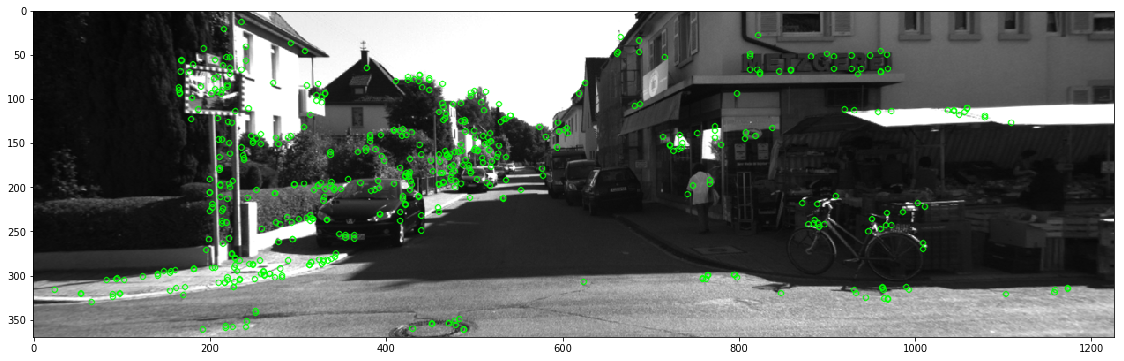

In [6]:
show(draw_frame(frame[3]))
len(frame[3].get_observations())

In [7]:
def draw_obs(mappoint, keyframeid):
    for i in mappoint.observations:
        if i.frame.keyframeid == keyframeid:
            obs1 = i
        elif i.frame.keyframeid == keyframeid + 1:
            obs2 = i
    show(draw_observations_xyz([obs1]))
    show(draw_observations_xyz([obs2]))


In [8]:
def check_contrast(mappoints):
    for j, mappoint in enumerate(mappoints):
        obs = sorted([ i for i in mappoint.observations], key=lambda x : x.frame.frameid)
        for i in range(len(obs) - 1):
            mean = obs[i].get_patch().flatten().mean()
            threshold = np.abs(np.array(obs[i].get_patch(), dtype=np.int16) - 
                               np.ones(obs[i].get_patch().shape, dtype=np.int16) * mean).std() / 2
            contrast = np.abs(np.array(obs[i].get_patch(), dtype=np.int16) - 
                            np.array(obs[i+1].get_patch(), dtype=np.int16)).std()
            if contrast > threshold:
                yield(j, obs[i].frame.keyframeid, contrast, threshold)

def get_obs(mappoint, keyframeid):
    for o in mappoint.observations:
        if o.frame.keyframeid == keyframeid:
            return o
                
a = sorted([ x for x in check_contrast(mappoints) ], key=lambda x: -x[2]/x[3])

In [9]:
# for o, f, c, t in a[0:]:
#     print('threshold ', t, 'contrast ', c)
#     draw_obs(mappoints[o], f)
#     break
# print(a[0])

# mappointid = a[0][0]
# o3 = get_obs(mappoints[mappointid], 9)
# o4 = get_obs(mappoints[mappointid], 10)
# #o3.satisfies_patch_contrast(o4)
# print(o4.cx, o4.cy, o4.get_depth())
# c = np.dot( o3.frame.get_world_pose(), o4.get_world_coords() )
# c = affine_coords_to_cam( c )
# print(c)
# wc = o3.get_world_coords()
# c = np.dot( o4.frame.get_world_pose(), wc )
# c = affine_coords_to_cam( c )
# c


btw seq.keyframes[0] is the same as frame[0]

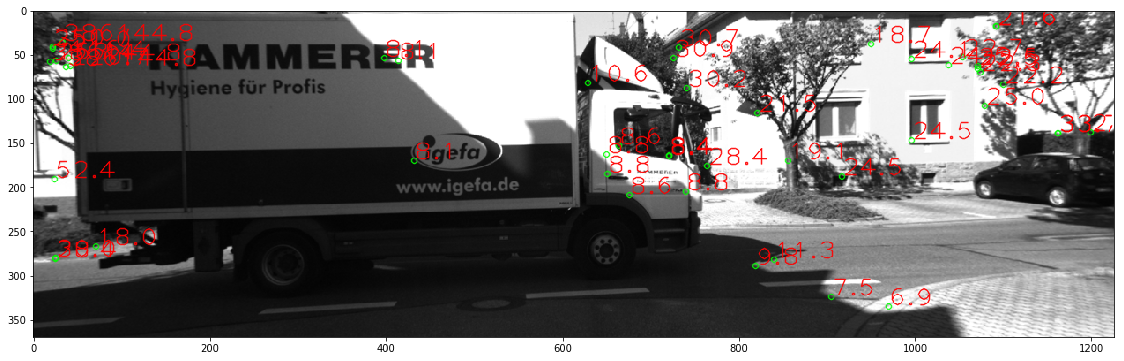

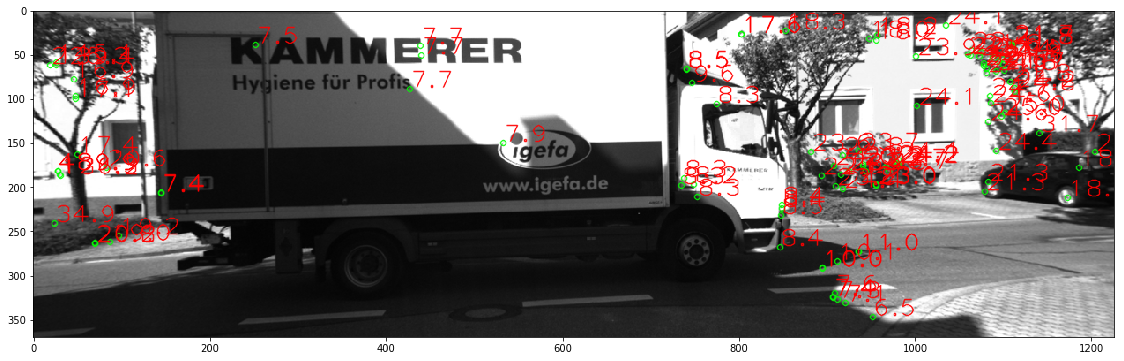

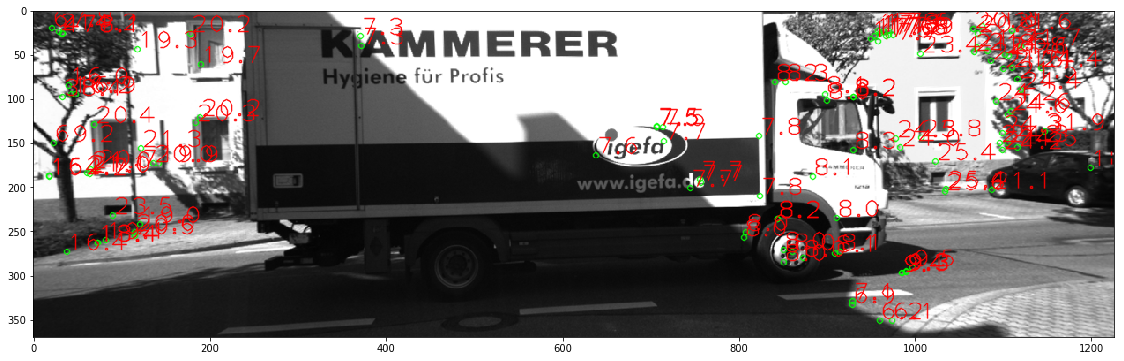

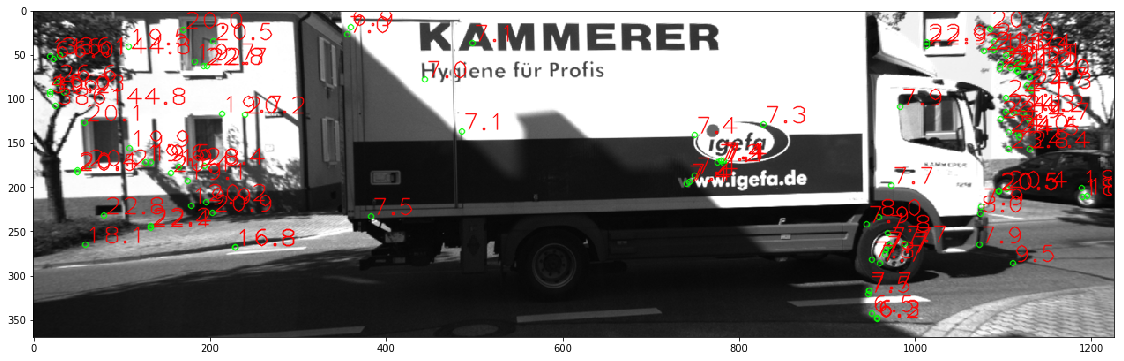

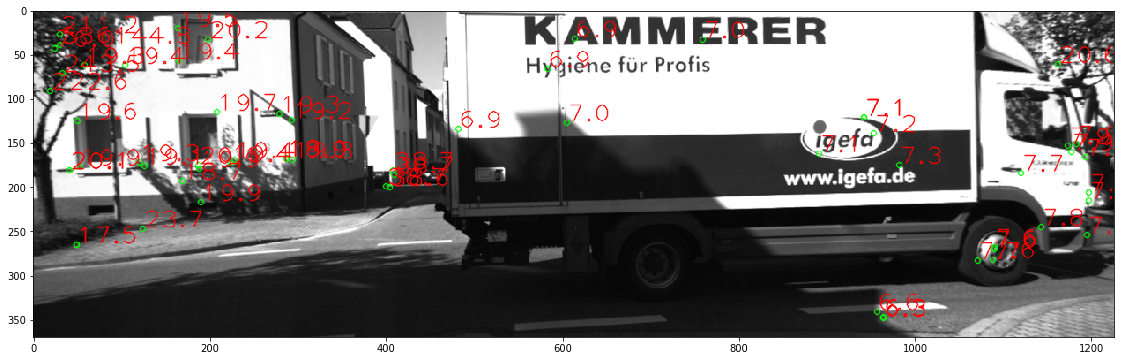

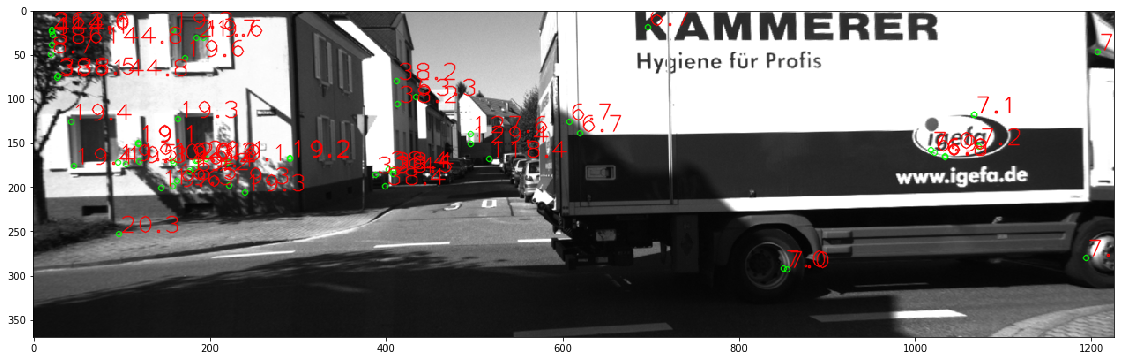

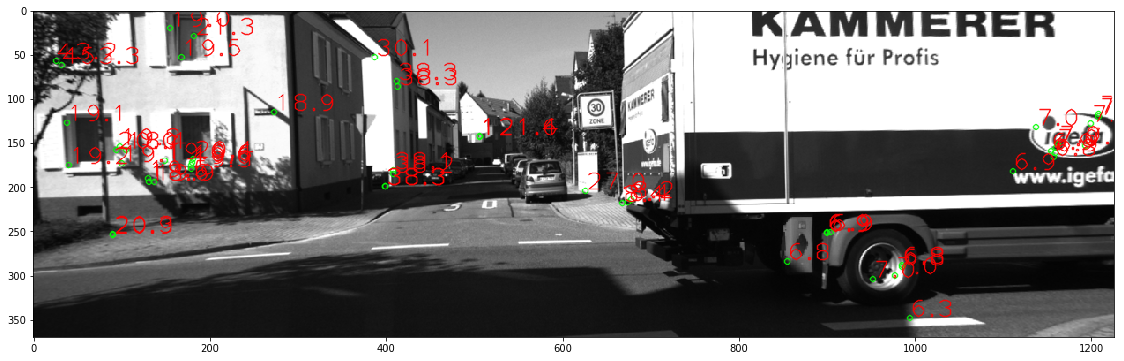

In [10]:
for f in range(636, 643):
    obs = frame[f].get_observations()
    show(draw_observations_depth(obs))

To the keyframes we add the non-keyframes in their .frames property. Thus frame[1] is added as the first non keyframe after keyframes[0].

In [11]:
#seq.keyframes[0].frames[0] == frame[1]

We can use show2 to display two frames side-by-side. Every left frame can load it's corresponding right frame and you can request to return it using get_right_frame(). By default, right frames are not loaded unless needed, which is the case for keyframes to compute the depth of points.

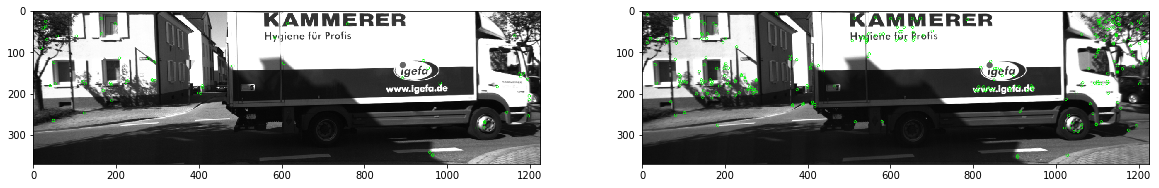

In [12]:
show2(draw_frame(seq.keyframes[10]), draw_frame(seq.keyframes[10].get_right_frame()))

You can also show the computed depth of observations. draw_frame_depth does not compute the depth but does show it if it has been computed. Alternatively you can use draw_observations() and draw_observations_depth() to show an image with a list of observations. This only makes sense if all observations belong to the same image. draw_frame_id() and draw_observations_id() show observations with their internal mappoint id to compare id's between images (did it map the same points).

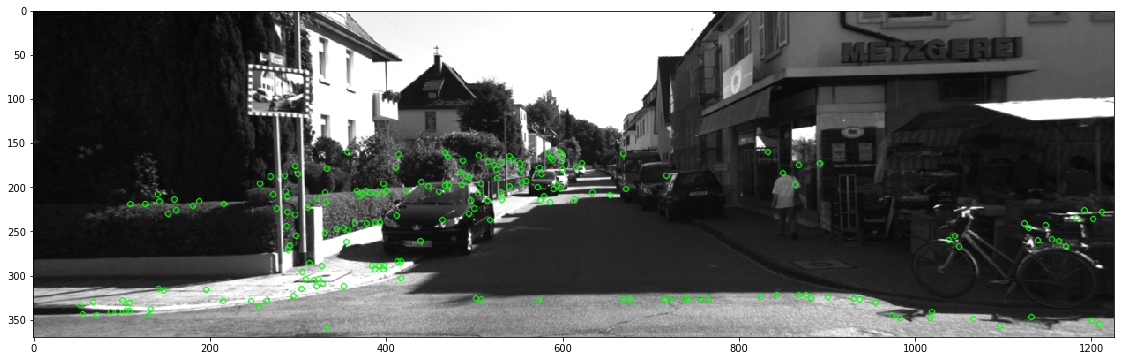

In [13]:
frame[0].compute_depth()
frame[0].filter_not_useful()
show(draw_observations_xyz(frame[10].get_observations()[-200:]))

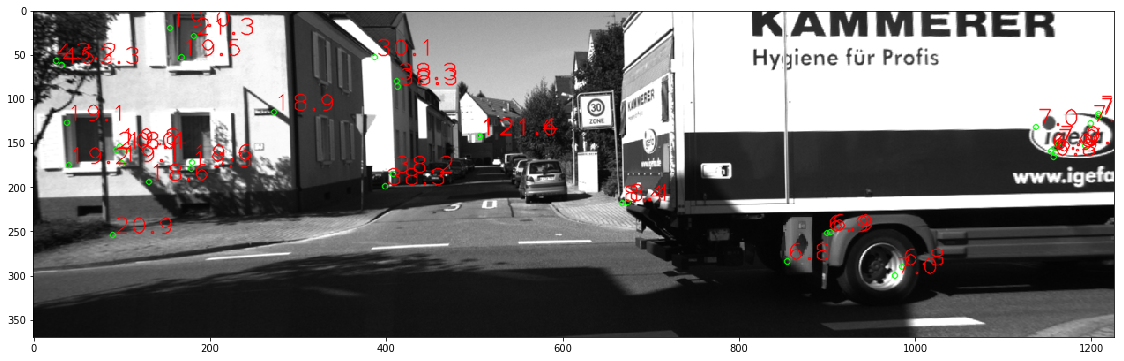

In [14]:
show(draw_observations_depth(obs[:40]))

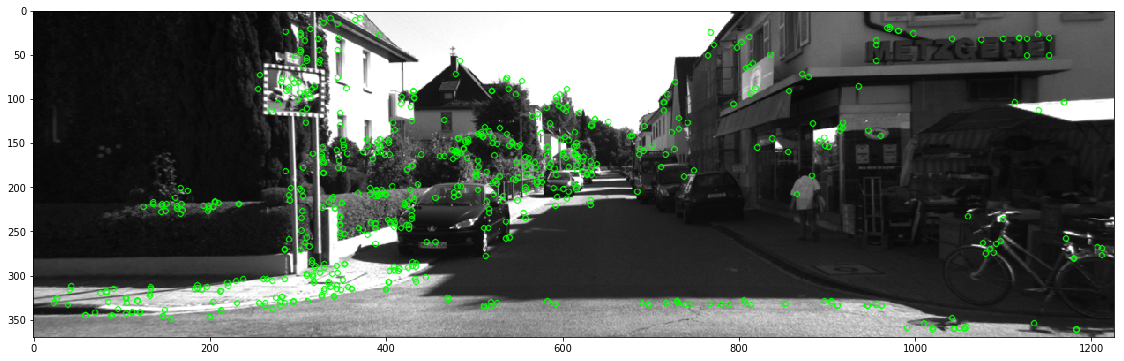

In [15]:
show(draw_frame_depth(frame[11]))

In [16]:
m = [ o.mappoint for o in frame[10].get_observations() ]
#for i in m[:10]:
#    print([ o.frame.frameid for o in i.observations])
obs = [ o for o in frame[10].get_observations() if 11 in  [ p.frame.frameid for p in o.mappoint.observations]]
obs

AttributeError: 'NoneType' object has no attribute 'observations'

We can also manually compute the Depth of the points and show these

In [ ]:
show(draw_frame(frame[629]))
show(draw_frame(frame[27]))

In [ ]:
len(frame[26].get_observations())

In [ ]:
mp27 = [ o.mappoint for o in frame[27].get_observations()
                if len(o.mappoint.observations) == 1 ]
mp26 = [ o.mappoint for o in frame[26].get_observations()
                if len(o.mappoint.observations) == 1 ]


len(mp26)

In [ ]:
keyframe = frame[26]
matches = match_frame(frame[27], keyframe.get_observations())
len(matches)

In [ ]:
count = 0
for obs in frame[27].get_observations():
    #obs.mappoint = None
    if obs.has_mappoint():
        count += 1
count

In [ ]:
## seq 0-30
#print(matches[0][1].frame.get_pose())
#print(matches[0][1].get_affine_coords())
#print(matches[0][1].get_world_coords())
for m in range(len(matches)):
    obs = matches[m][0]
    mappoint = matches[m][1].mappoint
    obs.mappoint = matches[m][1].mappoint
    last_observation = matches[m][1]
   # print(obs.frame.keyframeid, last_observation.frame.keyframeid)
    #print('last affine ', last_observation.get_affine_coords())
    #print('new affine ', obs.get_affine_coords())
    #print('new pose ', obs.frame.get_pose())
    last_affine = last_observation.get_affine_coords()
    #last_affine = np.array([last_affine[0], last_affine[1], last_affine[2], 1.0])
    affine_coords = np.dot( obs.frame.get_pose(), last_affine )  
    #affine_coords = np.dot( obs.frame.get_world_pose(), last_observation.get_world_coords() )
    cam_coords = affine_coords_to_cam( affine_coords )
    print(obs.cx, obs.cy, cam_coords[0], cam_coords[1])

In [ ]:
## seq 20-30
print(matches[0][1].frame.get_pose())
print(matches[0][1].get_affine_coords())
print(matches[0][1].get_world_coords())
for m in range(5):
    obs = matches[m][0]
    mappoint = matches[m][1].mappoint
    obs.mappoint = matches[m][1].mappoint
    last_observation = matches[m][1]
    print(obs.frame.keyframeid, last_observation.frame.keyframeid)
    print('last affine ', last_observation.get_affine_coords())
    print('new affine ', obs.get_affine_coords())
    print('new pose ', obs.frame.get_pose())
    last_affine = last_observation.get_affine_coords()
    #last_affine = np.array([last_affine[0], last_affine[1], last_affine[2], 1.0])
    affine_coords = np.dot( obs.frame.get_pose(), last_affine )  
    #affine_coords = np.dot( obs.frame.get_world_pose(), last_observation.get_world_coords() )
    cam_coords = affine_coords_to_cam( affine_coords )
    print(obs.cx, obs.cy, cam_coords[0], cam_coords[1])

In [ ]:
for m in range(5):
    print([i.get_world_coords() for i in matches[m]])
    show2(draw_observations_xyz([matches[m][1]]), draw_observations_xyz([matches[m][0]]))

In [ ]:
for i in range(630,650):
    obs = frame[i].get_static_observations()
    if i > 630:
        obs = [o for o in obs if frame[i-1] in [p.frame for p in o.mappoint.observations]]
    show2(draw_frame_depth(frame[i]), draw_observations(obs))